In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
df=pd.read_csv('Placement_Prediction_data.csv')

In [3]:
df.head()

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed


In [4]:
df.drop(columns=['Unnamed: 0','StudentId'],inplace=True)

In [5]:
df.head()

,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced
1,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed
2,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced
3,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed
4,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed


In [6]:
for col in['Internship','Hackathon','PlacementStatus']:df[col]=LabelEncoder().fit_transform(df[col])

In [7]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = MinMaxScaler().fit_transform(df[numerical_cols])

In [8]:
X = df.drop(columns=['PlacementStatus'])
y = df['PlacementStatus']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete!")

Preprocessing complete!


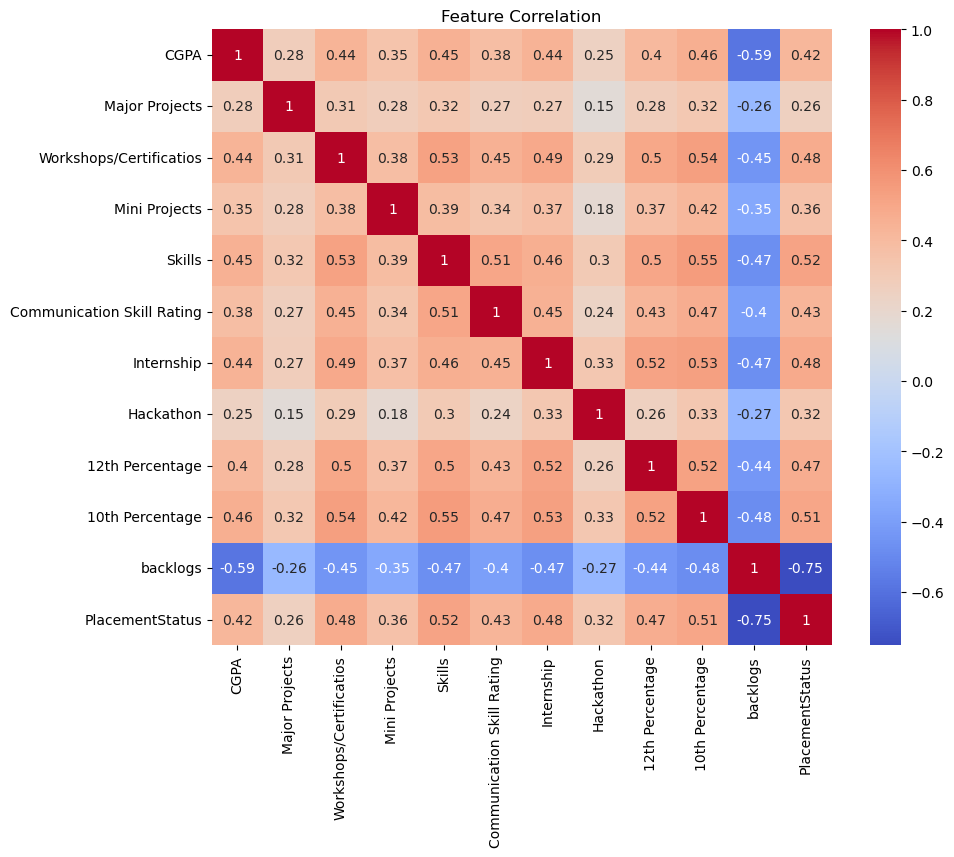

C:\Users\RKA\AppData\Local\Temp\ipykernel_15236\2978418539.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


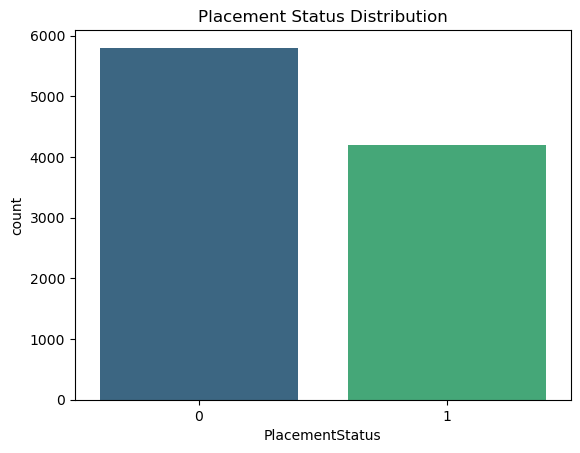

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Target variable distribution
sns.countplot(x=y, palette='viridis')
plt.title("Placement Status Distribution")
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9155

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1172
           1       0.87      0.93      0.90       828

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9355

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1172
           1       0.92      0.92      0.92       828

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=37, batch_size=32, validation_split=0.2)

# Evaluate on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)


Epoch 1/37


C:\Users\RKA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7331 - loss: 0.5462 - val_accuracy: 0.8731 - val_loss: 0.2915
Epoch 2/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8886 - loss: 0.2593 - val_accuracy: 0.8975 - val_loss: 0.2499
Epoch 3/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9134 - loss: 0.2194 - val_accuracy: 0.9119 - val_loss: 0.2314
Epoch 4/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9217 - loss: 0.1945 - val_accuracy: 0.9112 - val_loss: 0.2245
Epoch 5/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9201 - loss: 0.1833 - val_accuracy: 0.9119 - val_loss: 0.2222
Epoch 6/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9278 - loss: 0.1721 - val_accuracy: 0.9150 - val_loss: 0.2172
Epoch 7/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9299 - loss: 0.1771 - val_accuracy: 0.9125 - val_loss: 0.2117
Epoch 8/37
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9230 - loss: 0.1902 - val_accuracy: